## Objectif
Définir la catégorie d'un article : A1, C2 ou E3.

## Chargement des données

In [1]:
#import des librairies
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [2]:
#import des données
train = pd.read_csv('./data_train.csv', delimiter=',')
test = pd.read_csv('./data_test.csv', delimiter=',')


In [3]:
train.head(5)

,pmid,year,title,abstract,label
0,27597064,2016,Re: Enzalutamide versus Bicalutamide in Castra...,NaN,E3
1,25046451,2015,Cytotoxic chemotherapy in the contemporary man...,"For several years, docetaxel was the only trea...",C2
2,25193433,2014,Effectiveness and safety of cabazitaxel plus p...,To report the efficacy and safety of using cab...,C2
3,27815387,2016,Polycomb-Mediated Disruption of an Androgen Re...,The lethal phenotype of castration-resistant p...,E3
4,25687355,2015,Safety and effectiveness of enzalutamide in me...,Enzalutamide (MDV3100) is a second-generation ...,E3


In [4]:
test.head(5)

,pmid,year,title,abstract
0,21382150,2011,Current and emerging treatment modalities for ...,Docetaxel-based therapy is established as the ...
1,27018069,2016,Enzalutamide in Japanese patients with chemoth...,"To evaluate the treatment effects, safety and ..."
2,24314736,2013,[Corticotherapy in castration-resistant prosta...,Corticosteroids are commonly used in the treat...
3,25907622,2015,Clinical outcomes in a contemporary series of ...,The prognosis of younger patients with prostat...
4,26633646,2015,Systemic Medical Treatment in Men with Metasta...,The approval or clinical evaluation of several...


## Traitement des données manquantes

Nous allons supprimer les observations dont au moins une colonne n'est pas renseignée (NaN)

In [5]:
def cleandata(df):
    # Nombre d'observations
    n_obs = df.shape[0]
    print("n_obs  = %d" %n_obs)
    # On enlève les lignes contenant des NaN
    df.dropna(inplace=True) 
    n_obs2 = df.shape[0]
    print("n_obs sans NA  = %d" %n_obs2)

In [6]:
cleandata(train)

n_obs  = 150
n_obs sans NA  = 128


In [7]:
cleandata(test)

n_obs  = 45
n_obs sans NA  = 40


In [8]:
#Proportion de A1, C2 et E3
def visualizedata(df):
    print(df.groupby(['label']).size())
    df.groupby(['label']).size().plot.bar()
    plt.show()

label
A1    42
C2    47
E3    39
dtype: int64


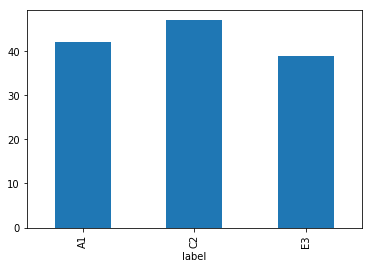

In [9]:
visualizedata(train)

## Préparation des données
Nous allons lemmatiser les mots, enlever les 'stopwords' (et les signes de ponctuations) puis vectoriser les colonnes 'title' et 'abstract'.

In [10]:
from nltk.stem import WordNetLemmatizer

import string
stopwords = nltk.corpus.stopwords.words('english') 
add_words = []
add_words.extend([char for char in string.punctuation])
for w in add_words:
    stopwords.append(w)

def processobs(sentence):
    #on tokenise la phrase
    tokens = nltk.word_tokenize(sentence)
    #on associe à chaque mot sa nature grammaticale
    tokenspos = nltk.pos_tag(tokens)
    #on lemmatise chaque mot
    lemmas = lemmatizer(tokenspos)
    #on enlève les stopwords
    nostopwords =  removestopwords(lemmas)
    #on remet sous forme de string
    return listtostring(nostopwords)

def lemmatizer(tokenspos): # Entrée de la forme [(mot1,tag1),(mot2,tag2)....]
    wordnet_lemmatizer = WordNetLemmatizer()
    posVerb = []
    for t in tokenspos:
        if t[1][0] == 'V':
            posVerb.append(wordnet_lemmatizer.lemmatize(t[0],pos='v'))
        else:
            posVerb.append(wordnet_lemmatizer.lemmatize(t[0]))
    return posVerb 

def removestopwords(lemmas):
    out = []
    for t in lemmas:
        if t.lower() not in stopwords:
            out.append(t.lower())
    return out

def listtostring(liste):
    a=''
    for word in liste:
        a = a+' '+word
    return a

In [11]:
train['titlekw'] = train.title.apply(lambda x: processobs(x))
train['abstractkw'] = train.abstract.apply(lambda x: processobs(x))
test['titlekw'] = test.title.apply(lambda x: processobs(x))
test['abstractkw'] = test.abstract.apply(lambda x: processobs(x))

In [12]:
train.head(5)

,pmid,year,title,abstract,label,titlekw,abstractkw
1,25046451,2015,Cytotoxic chemotherapy in the contemporary man...,"For several years, docetaxel was the only trea...",C2,cytotoxic chemotherapy contemporary managemen...,several year docetaxel treatment show improve...
2,25193433,2014,Effectiveness and safety of cabazitaxel plus p...,To report the efficacy and safety of using cab...,C2,effectiveness safety cabazitaxel plus prednis...,report efficacy safety use cabazitaxel plus p...
3,27815387,2016,Polycomb-Mediated Disruption of an Androgen Re...,The lethal phenotype of castration-resistant p...,E3,polycomb-mediated disruption androgen recepto...,lethal phenotype castration-resistant prostat...
4,25687355,2015,Safety and effectiveness of enzalutamide in me...,Enzalutamide (MDV3100) is a second-generation ...,E3,safety effectiveness enzalutamide men metasta...,enzalutamide mdv3100 second-generation androg...
5,23044721,2012,Peg-filgrastim and cabazitaxel in prostate can...,To determine the impact of prophylaxis with gr...,C2,peg-filgrastim cabazitaxel prostate cancer pa...,determine impact prophylaxis granulocyte-colo...


In [13]:
test.head(5)

,pmid,year,title,abstract,titlekw,abstractkw
0,21382150,2011,Current and emerging treatment modalities for ...,Docetaxel-based therapy is established as the ...,current emerge treatment modality metastatic ...,docetaxel-based therapy establish standard fi...
1,27018069,2016,Enzalutamide in Japanese patients with chemoth...,"To evaluate the treatment effects, safety and ...",enzalutamide japanese patient chemotherapy-na...,evaluate treatment effect safety pharmacokine...
2,24314736,2013,[Corticotherapy in castration-resistant prosta...,Corticosteroids are commonly used in the treat...,corticotherapy castration-resistant prostate ...,corticosteroids commonly use treatment prosta...
3,25907622,2015,Clinical outcomes in a contemporary series of ...,The prognosis of younger patients with prostat...,clinical outcome contemporary series `` young...,prognosis younger patient prostate cancer unc...
4,26633646,2015,Systemic Medical Treatment in Men with Metasta...,The approval or clinical evaluation of several...,systemic medical treatment men metastatic cas...,approval clinical evaluation several new agen...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def vectorize_Tfidf(df, column):
    vectorizer = CountVectorizer(min_df = 0.1) #on ne considère que les mots ayant une fréquence supérieure à 0.1
    vectorizer.fit(train[column])
    VECT = vectorizer.transform(df[column])
    vectorizer1 = TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
    return vectorizer1.fit_transform(VECT)

In [15]:
#Nous allons concaténer les matrices obtenues et ajouter la colonne 'year'. 

from scipy.sparse import hstack

def getarray(df):
    title = vectorize_Tfidf(df, 'titlekw')
    abst = vectorize_Tfidf(df, 'abstractkw')
    hh = hstack((title, abst)).toarray()
    return np.insert(hh,0,np.asarray(df['year']), axis=1)

In [16]:
X_train = getarray(train)
Y_train = np.asarray(train['label'])
X_test = getarray(test)
print(X_train.shape)
print(X_test.shape)

(128, 211)
(40, 211)


## Choix du classifieur
Nous allons tester les classifieurs suivants et choisir par validation croisée le meilleur, que nous utiliserons pour la base de test.

-RandomForest
-Réseaux de neurones
-K plus proches voisins
-Gradient Boosting
-Adaboost


In [22]:
import sklearn.cross_validation
from sklearn.cross_validation import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

clfs={
    'RF50':RandomForestClassifier(n_estimators=50),
    'RF10':RandomForestClassifier(n_estimators=10),
    'KNN10':KNeighborsClassifier(n_neighbors=10),
    'KNN5':KNeighborsClassifier(n_neighbors=5),
    'AD': AdaBoostClassifier(n_estimators=50),
    'GB':GradientBoostingClassifier(n_estimators=100),
    'MLP': MLPClassifier()
}

#fonction qui lance la comparaison des algorithmes
import time
def run_classifiers(clfs, X, Y):
    kf=KFold(128,n_folds=12,shuffle=True,random_state=0)
    for i in clfs:
        clf=clfs[i]
        print(i)
        start = time.time()
        for score in ["accuracy"]:
            print(score+" : ")
            scores= cross_val_score(clf, X, Y,scoring=score, cv=kf)
            print("%0.3f " % (scores.mean()))
        print("temps écoulé : %0.6f" % (time.time() - start))

In [24]:
run_classifiers(clfs, X_train, Y_train)

RF50
accuracy : 
0.820 
temps écoulé : 0.737443
RF10
accuracy : 
0.694 
temps écoulé : 0.172765
KNN10
accuracy : 
0.604 
temps écoulé : 0.023047
KNN5
accuracy : 
0.603 
temps écoulé : 0.022074
AD
accuracy : 
0.627 
temps écoulé : 1.066411
GB
accuracy : 
0.861 
temps écoulé : 4.881024
MLP
accuracy : 
0.274 
temps écoulé : 0.155168


La méthode la plus précise est le Gradient Boosting, avec une précision générale de 0.861. Nous allons donc l'utiliser.

## Test

In [25]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, Y_train)
result = gb.predict(X_test)
print(result)

['C2' 'E3' 'A1' 'C2' 'C2' 'E3' 'C2' 'E3' 'C2' 'C2' 'E3' 'A1' 'C2' 'A1' 'A1'
 'C2' 'E3' 'C2' 'A1' 'E3' 'A1' 'E3' 'C2' 'E3' 'C2' 'A1' 'C2' 'C2' 'C2' 'A1'
 'E3' 'C2' 'C2' 'C2' 'A1' 'E3' 'A1' 'E3' 'C2' 'A1']


In [29]:
#création du csv

test['predictedlabel'] = result
sub = test[['pmid','predictedlabel']]
sub.to_csv('submission.csv', encoding='utf-8',index=False)

In [30]:
pd.read_csv('./submission.csv', delimiter=',')

,pmid,predictedlabel
0,21382150,C2
1,27018069,E3
2,24314736,A1
3,25907622,C2
4,26633646,C2
5,27474149,E3
6,21076710,C2
7,23436650,E3
8,22522765,C2
9,26829012,C2
